# Välkomna till dataanalys och programmering!

I den här övningen går vi genom exempel på hur Python-programmering kan användas i dataanalys. Vi börjar med grunderna i Jupyter Notebook-miljön och går därfrån vidare med programmeringsspråket Python.

# Notebooks

Jupyter Notebooks är dokument, där vi kan skriva text och infoga bilder, samt skriva och köra kod.

Dokumentet byggs upp av "celler", antingen **textceller** (Markdown) eller **kodceller** (Code). Denna cell är en textcell. Om du klickar på en här cellen ser du att cellens vänstra kant blir blå för att visa att den är markerad. Om du istället dubbelklickar cellen öppnar du den i **edit mode**. I edit mode kan du ändra cellens innehål, och när du är klar kan du köra cellen med att trycka **Ctrl + Enter**, så processeras texten.

Nedan finns ett exempel på en kodcell. Man känner igen kodceller på texten `In [ ]:` till vänster om dem. I kodcellerna kan vi skriva kod i rogrammeringsspråket Python. Testa att markera cellen nedan och kör den med **Ctrl + Enter** för att se vad den gör.

In [1]:
# Textrader som börjar med # i en kodcell är kommentarer, och påverkar inte koden.
# Kommentarer används vanligen för att beskriva vad kodcellen gör eller för att ge instruktioner.

print('Hello, World!')      # print() -kommandot ber kodcellen skriva ut ett meddelande.

Hello, World!


Fint! Du körde nyss din första kodcell! När kodcellen har körts, står ett ordningstal/index bredvid cellen, ex.`In [1]:`. Om hakparentesen innehåller en asterisk (`In [*]:`), så håller cellen på att köras.

I notebooks kan du lägga till celler med hjälp av "**+**"-knappen i menyn ovanför. I menyn finns också alternativ för att ändra cellens typ (markdown/code). Testa själv att lägga till en kodcell och be den skriva ut ett meddelande på samma sätt som *Hello World!*-koden ovan!

# Python-programmering

Denna övning är ämnad att handleda dig i dataanalys med Python. Därför kommer vi inte att gå igenom så många av Pythons grundläggande trick och funktioner, utan kommer att bekanta oss med de specifika verktyg som behövs för dataanalys. Om du vill ha en bredare kunskap om Python kan du ta en titt på hemsidan [https://www.learnpython.org/](https://www.learnpython.org/).

## Att läsa data ur en fil

En viktig del av dataanalys är insamling av data. Samlad data brukar sparas i en tabell i någon textfil eller kalkylblad. Vi tar Meteorologiska Institutets väderobservationer som exempel: Observationerna sparas i datafiler, och i [Meteorologiska Institutets söktjänst](https://www.ilmatieteenlaitos.fi/havaintojen-lataus) kan man söka information med bestämda kriterier (t.ex. månatlig medeltemperatur, jan-dec 2020, Helsingfors-Vanda flygfält), och sedan kan vi ladda ned informationen som csv-fil. Data över månatliga medeltemperaturer finns sparat i samma mapp som denna notebook med namnet "keskilampotila2020_Helsinki.csv".

I Python finns en del grundfunktioner, så som **print()**-kommandot vi testade ovan, men vi kan utöka möjligheterna genom att importera *funktionspaket/moduler*. Python är ett vitt använt programmeringsspråk och moduler finns i mängd och massor. Vi kommer här att bekanta oss med två moduler som lämpar sig för dataanalys, nämligen **matplotlib** och **pandas**. Pandas-paketet innehåller verktug för att läsa in datafiler, och matplotlib låter oss skapa grafer.

Man kan läsa in paket med hjälp av **import**-kommandot på följande sätt:

```python
import pandas
```

Därefter kan man använda verktygen som ingår i pandas-paketet, t.ex. [**read_csv()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html):

```python
data = pandas.read_csv(...)
```
read_csv-kommandot läser in en datafil i csv-format och kan spara den som en variabel, i detta fall variabeln 'data'.

Vanligen anger vi en förkortning för paketet med kommandot **import** ... **as**, för att göra resten av koden lite smidigare:

```python
import pandas as pd
data = pd.read_csv(...)
```

<div class="alert alert-info">
    
**Paket**

Ta paketet i bruk med **import**-kommandot

```python
import modulens_namn as förkortning
```

Exempel:
    
```python
import pandas as pd
```
</div>

In [ ]:
# Använd denna cell för att skriva en kod som tar pandas i bruk under förkortningen "pd"
# Kör cellen. Obs! Cellen skriver inte ut något, men den gör så att pandas kan användas i resten av koden.


Man kan läsa in data från ett dokument med hjälp av [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)-verktyget. I Python kallar vi sådana verktyg *funktioner*. I praktiken är funktioner förkortningar för bestämda kodsegment som vi använder ofta. En lista över Pythons inbyggda funktioner hittar du [här](https://docs.python.org/3/library/functions.html), till exempel  [`print()`](https://docs.python.org/3/library/functions.html#print), som vi använde tidigare. I `print()`-funktionens parenteser skriver vi den text som ska skrivas ut, och vi kallar det för funktionens *parametrar*. Olika funktioner kräver olika parametrar. Vi tar ett exempel med funktionen [`pow(x, y)`](https://docs.python.org/3/library/functions.html#pow), som höjer ett givet tal x i potensen y:

In [3]:
# Vi räknar 3 upphöjt i 2. 
# Kör denna cell

pow(3,2)

9

Funktionen kan alltså returnera en *output*, som talet 9 i den förra cellen. Funktionens output kan också sparas som en *variabel*, så att den kan användas senare i koden.

In [4]:
# Vi räknar 3^2 och sparar resultatet som variabeln "x"
# Kör denna cell. Obs: Cellen skriver inte ut någon output - vi bara definierar en variabel.

x = pow(3,2)

In [5]:
# Skriv ut variabelns x värde.
# Obs. När vi skriver ut ett variabelvärde använder vi inga citationstecken.
# Du kan testa vad som händer om du lägger till citationstecken kring "x".
# Kör cellen!

print(x)

9


Så vissa funktioner finns alltså i Python hela tiden, men funktionspaket så som pandas och matplotlib utgör nödvändiga tillägg.
Man kan också skapa funktioner själv, men det går vi inte igenom här.

Vi återgår till att läsa in data. Vi gör detta med pandas-paketets [**read_csv()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)-funktion, och som funktionsparameter sätter vi namnet på den datafil som ska läsas. *Detta fungerar om filen finns i samma mapp som Notebooken.* En csv-fil (comma separated values) är en textfil bestående av tabellvärden som skiljs med kommatecken.

```python
pd.read_csv('filnamn.csv')   # Kom ihåg '-tecknen
```

[`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)-funktionen kan också ta emot andra parametrar, t.ex.  `delimiter=";"`, vilket gör att funktionen tolkar semikolon istället för kommatecken som skiljetecken. En fullständig lista över funktionens parametrar hittas [här](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Vi har dock ingen nytta av att bara läsa in data, vi behöver också kunna spara den för att använda den i koden. Vi kan spara datan i en variabel precis som i det föregående exemplet med potensräkning:

```python
data = pd.read_csv('filnamn.csv')
```
När vi har sparat datan i variabeln med namnet "data" kan vi hantera den senare i koden genom att referera till den variabeln. Variabeln måste inte heta "data". Du kan hitta på ett variabelnamn själv.

<div class="alert alert-info">
    
**Funktioner**
    
Att använda en funktion och spara dess output som en variabel:
```python
x = funktionens_namn(arg)
data = pd.read_csv('filnamn.csv')
```
</div>

In [11]:
# Använd denna cell för att skriva en kod som läser in datafilen 'Medeltemperatur2020_Helsingfors.csv'
# och spara den som variabeln "data". Kom ihåg att köra cellen!

## Kontrollera data

Nu när vi har läst in datan och sparat variabeln "data", kan vi undersöka den med [**head()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)-funktionen, som skriver ut de första raderna av tabellen. **head()**-kommandot fungerar på variabler som är av typen DataFrame (tabell). Funktionen **read_csv** gör om en csv-fil till en DataFrame, så om du har definierat variabeln *data* enligt instruktionerna ovan borde du se en bit av tabellen när du kör nästa cell.

In [8]:
# Kör denna cell för att se de första raderna av tabellen 'data'

data.head()

,Ar,Manad,Medeltemperatur (Celsius)
0,2020,1,1.9
1,2020,2,0.5
2,2020,3,1.7
3,2020,4,4.5
4,2020,5,9.5


Före [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)-funktionen skriver vi alltså variabeln som innehåller den tabell vi vill undersöka. Funktionen skriver vanligen ut de fem första raderna, men man kan ändra på detta genom att lägga till en parameter. **data.head(8)** skriver ut de åtta första.

Ibland är det bra att undersöka vilka kollumner som finns i filen. Då kan vi använda [**columns**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html)-kommandot. Obs. **columns** är inte en funktion, utan en *egenskap* hos variabeln, och därför behöver vi inga parenteser efter kommandot. 

```python
data.columns
```

<div class="alert alert-info">
    
**Att kontrollera data**

Vi sparar data i variabeln "data"

```python
data = pd.read_csv('tiedostonimi.csv')
```
    
Skriv ut de första raderna för kontroll
```python3    
data.head() # 5 första raderna
data.head(8) # 8 första raderna
```
    
Skriv ut de sista raderna
```python3    
data.tail(3) # 3 sista raderna
```
    
Kontrollera kolumnerna i datan (kolumnrubriker)
```python3    
data.columns
```
</div>

In [ ]:
# Skriv ut de första raderna av tabellen 'data' och se vad den innehåller



In [ ]:
# Kontrollera vilka kolumner som finns i 'data'



## Att välja data

I det föregående skedet såg vi att vår data innehåller kolumnerna "Ar", "Manad" och "Medeltemperatur (Celsius)". Oftast är vi intresserad av någon specifik kolumn i datafilen. Vi vill kanske rita en graf, där x-axeln visar mnader och y-axeln visar månadernas medeltemperaturer.

I så fall kan vi spara kolumnerna som skilda variabler: 


```python
kolumndata = data['kolumnens_namn']
```

<div class="alert alert-info">
    
**Att välja data**

Vi väljer ut en kolumn från en DataFrame (tabellvariabel)

```python
kolumndata = data['kolumnens_namn']
```

Vi sparar t.ex. kolumnen 'Medeltemperatur (Celsius)' som en variabel 'temp'.
    
```python
temp = data['Medeltemperatur (Celsius)']
```
</div>

In [ ]:
# Välj kolumnerna 'Medeltemperatur (Celsius)' och 'Manad' och spara dem som variablerna 'temp' och 'man'
# Kom ihåg att köra cellen.


In [ ]:
# Kontrollera 'temp'-variabeln med .head()-kommandot.



## Visualisera data

För visualisering av data med hjäp av grafer behöver vi **matplotlib**-paketet. Det här paketet innehåller många praktiska funktioner för att rita bilder, grafer och diagram. För grafer använder vi delpaketet  **matplotlib.pyplot**. Det är vanligt att vi förkortar paketet till **plt** när vi importerar det. 

```python
import matplotlib.pyplot as plt
```

<div class="alert alert-info">
    
**Matplotlib-funktioner**

```python
plt.plot(x, y) # Vi ritar y som funktion av x (x och y är listor med värden)
plt.xlabel('namn') # x-axelns namn
plt.ylabel('namn') # y-axelns namn
plt.title('rubrik') # Grafens rubrik
plt.show() # Visar grafen
```
</div>

In [1]:
# läs in matplotlib.pyplot med hjälp av import-kommandot.
# Använd förkortningen plt. Kom ihåg att köra cellen.



In [2]:
# Använd funktionen plt.plot() och rita en graf där månaderna finns på x-axeln och temperaturerna på y-axeln.
# Istället för x och y kan du använda variablerna 'man' och 'temp'


## Exempel

Vi ritar in tre städers (Helsingfors, Tammerfors, Uleåborg) månatliga medeltemperaturer 2020 i samma graf. Datafilerna i samma mapp som denna notebook heter:

- keskilampotila2020_Helsinki.csv
- keskilampotila2020_Tampere.csv
- keskilampotila2020_Oulu.csv

Obs. Kodcellerna nedan är klara att köras utan att du ändrar något. Du kan också fritt testa dig fram med att ändra delar av koden.

In [3]:
# Vi läser in de nödvändiga paketen

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Vi läser datafilerna och sparar dem som variabler.

data_hel = pd.read_csv('keskilampotila2020_Helsinki.csv')
data_tre = pd.read_csv('keskilampotila2020_Tampere.csv')
data_oul = pd.read_csv('keskilampotila2020_Oulu.csv')

In [5]:
# Vi kontrollerar datan

data_hel.head()

,Vuosi,Kk,Keskilämpötila (°C)
0,2020,1,1.9
1,2020,2,0.5
2,2020,3,1.7
3,2020,4,4.5
4,2020,5,9.5


In [6]:
data_tre.head()

,Vuosi,Kk,Keskilämpötila (°C)
0,2020,1,0.9
1,2020,2,-0.9
2,2020,3,0.7
3,2020,4,3.4
4,2020,5,8.5


In [7]:
data_oul.head()

,Vuosi,Kk,Keskilämpötila (°C)
0,2020,1,-1.9
1,2020,2,-3.6
2,2020,3,-1.6
3,2020,4,0.6
4,2020,5,7.1


In [8]:
# Vi skiljer ut temperaturskolumnerna från datan (Medeltemperatur = Keskilämpötila)

lämp_hel = data_hel['Keskilämpötila (°C)']
lämp_tre = data_tre['Keskilämpötila (°C)']
lämp_oul = data_oul['Keskilämpötila (°C)']

In [9]:
# Alla tabeller har samma månadsnumrering, så vi behöver bara ta ut en sådan. (Månad = Kuukausi = Kk)

kk = data_hel['Kk']

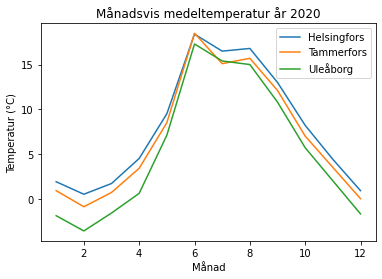

In [10]:
# Vi ritar en graf

plt.plot(kk, lämp_hel, label='Helsingfors') # Helsingfors' temperatur
plt.plot(kk, lämp_tre, label='Tammerfors') # Tammerfors' temperatur
plt.plot(kk, lämp_oul, label='Uleåborg') # Uleåborgs temperatur
plt.xlabel('Månad') # x-axelns namn
plt.ylabel('Temperatur (°C)') # y-axelns namn
plt.title('Månadsvis medeltemperatur år 2020') # Grafens rubrik
plt.legend() # Visar en låda med förklaringar till grafen, enligt 'label ='-parametrarna tidigare.
plt.show() # Visar bilden